# 0.5 Making dataset

In [1]:
%matplotlib inline

In [2]:
cd /Users/anacriel/plant_seed_classification/

/Users/anacriel/plant_seed_classification


In [3]:
import src.visualization.visualize as vs
import src.features.build_features as bf
import os
import cv2
import pandas as pd
import numpy as np
from src.data.make_dataset import get_images
from src.data.make_dataset import create_dataset_added_features
from matplotlib import pyplot as plt

In [4]:
cd /Users/anacriel/plant_seed_classification/src

/Users/anacriel/plant_seed_classification/src


In [5]:
proc_data_dir = '../data/raw/'
train_image_dir = os.path.join(proc_data_dir, 'train')

In [6]:
images, labels_str = get_images(train_image_dir)

In [7]:
labels_int = []
mapping = { 'Sugar beet': 0, 'Fat Hen': 1, 'Scentless Mayweed' : 2, 'Charlock' : 3,
           'Small-flowered Cranesbill': 4, 'Maize': 5, 'Shepherds Purse' :6, 'Common wheat': 7,
           'Common Chickweed': 8, 'Cleavers': 9, 'Loose Silky-bent' : 10, 'Black-grass': 11 }
for label in labels_str:
    labels_int.append(mapping[label])

In [9]:
images = np.reshape(images,(-1,100,100,3))
labels = np.array(labels_int)

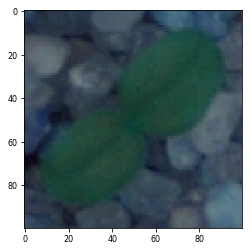

In [10]:
plt.imshow(images[29]) ##!!!!! damn 754

In [11]:
#dataset = create_dataset(images, labels)
dataset = create_dataset_added_features(images, labels, kind='label')

In [12]:
dataset.head(30)

,label,area,largest_area,number_of_elems,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,entropy
0,9,2133.0,1822.0,2,280.793937,43,100,0.430000,2.015940,36.964480,12.9523,14.4827,8.2423,24.602960,27.150313,15.926989,798.413592,0.942105,2.992182
0,9,2500.5,2500.5,1,317.806129,100,78,1.282051,3.119376,40.392216,16.3571,18.2915,9.5064,27.949529,31.186275,16.515143,750.108469,0.948059,3.276012
0,9,1784.0,1784.0,1,332.048769,53,100,0.530000,2.970852,61.802906,12.8240,14.3613,8.2327,27.807226,30.356000,18.936165,730.766051,0.933914,2.618097
0,9,1994.5,1046.0,2,164.852812,45,50,0.900000,1.128102,13.625695,13.0020,15.1166,7.3771,25.472204,29.425183,14.573383,688.389046,0.944156,2.584050
0,9,2838.5,1750.5,2,167.237589,52,55,0.945455,1.007574,9.853236,17.0790,19.7248,10.8707,27.087568,30.780326,17.441261,743.034168,0.953584,3.408798
0,9,2465.0,2465.0,1,270.450791,48,100,0.480000,1.947262,29.672872,16.5533,19.0490,9.7019,28.759401,32.619979,17.060118,577.579859,0.957973,3.028227
0,9,2792.5,2792.5,1,262.492422,85,74,1.148649,2.252462,24.674045,16.9637,20.3416,7.1692,27.363252,32.412910,12.667682,649.537944,0.958506,3.477278
0,9,2151.0,2151.0,1,368.333040,80,100,0.800000,3.719200,63.072631,12.3743,13.9355,7.7340,23.444142,26.129633,15.010225,972.948836,0.932289,3.016999
0,9,3079.5,3079.5,1,307.806129,86,100,0.860000,2.792661,30.766233,19.1662,22.1449,11.2490,28.618794,33.197893,17.616804,730.750832,0.955431,3.831829
0,9,1321.0,1321.0,1,227.622364,48,92,0.521739,3.342922,39.221757,8.1485,9.4363,3.6703,20.674338,23.585617,9.597468,571.706466,0.939739,1.950530


In [13]:
dataset.to_csv("data/features_resolut_66.csv")